# train ICDAR2015

In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

from dl.data.txtdetn import augmentations, datasets, target_transforms, transforms
from dl.data.txtdetn.utils import batch_ind_fn_droptexts
from dl.models.ssd.textboxespp import TextBoxesPP

from dl.loss.textboxespp import TextBoxLoss, ConfidenceLoss
from dl.optim.scheduler import IterStepLR
from dl.log import *

#from torchvision import transforms > not import!!
from torch.utils.data import DataLoader
from torch.optim.adam import Adam
import torch

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
augmentation = augmentations.RandomSampled()
#augmentation = None

transform = transforms.Compose(
    [transforms.Resize((384, 384)),
     transforms.ToTensor(),
     transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     #target_transforms.ToQuadrilateral(),
     target_transforms.OneHot(class_nums=datasets.SynthText_class_nums, add_background=True),
     target_transforms.ToTensor()]
)

train_dataset = datasets.ICDAR2015TextDataset(ignore=None, transform=transform, target_transform=target_transform, augmentation=augmentation)

train_loader = DataLoader(train_dataset,
                          batch_size=32,
                          shuffle=True,
                          collate_fn=batch_ind_fn_droptexts,
                          num_workers=4,
                          pin_memory=True)

In [3]:
model = TextBoxesPP(input_shape=(384, 384, 3)).cuda()
model.load_weights('../weights/results/synthtext/pretrained-synthtext_i-60000.pth')
print(model)

TextBoxesPP(
  (codec): TextBoxCodec(
    (encoder): TextBoxEncoder()
    (decoder): TextBoxDecoder()
  )
  (defaultBox): DBoxTextBoxOriginal()
  (predictor): TextBoxPredictor()
  (inferenceBox): InferenceBox()
  (feature_layers): ModuleDict(
    (convRL1_1): ConvRelu(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (convRL1_2): ConvRelu(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (convRL2_1): ConvRelu(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (convRL2_2): ConvRelu(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dila

<IPython.core.display.Javascript object>


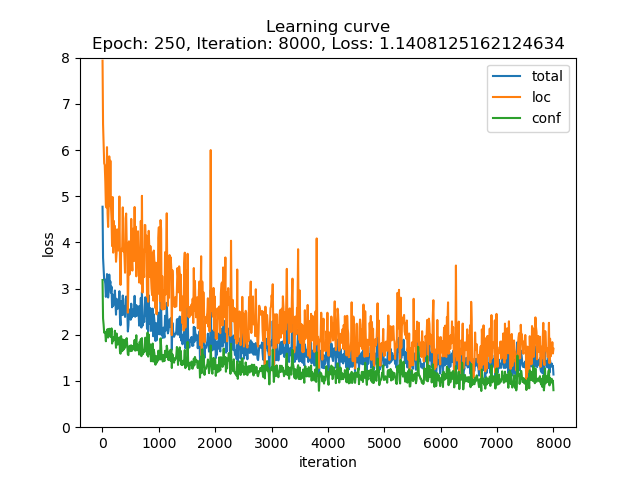

Training... Epoch: 32, Iter: 1000,	 [256/1000	 (25%)]	Loss: 2.476745, Loc Loss: 4.326910, Conf Loss: 1.611362	Iter time: 0.3700
Saved model to ../weights/checkpoints/train-icdar2015-stage1_i-0001000_checkpoints20200616.pth

Training... Epoch: 63, Iter: 2000,	 [512/1000	 (50%)]	Loss: 1.937734, Loc Loss: 2.277952, Conf Loss: 1.482143	Iter time: 0.36834
Saved model to ../weights/checkpoints/train-icdar2015-stage1_i-0002000_checkpoints20200616.pth

Training... Epoch: 94, Iter: 3000,	 [768/1000	 (75%)]	Loss: 1.873421, Loc Loss: 2.853241, Conf Loss: 1.302772	Iter time: 0.34606
Saved model to ../weights/checkpoints/train-icdar2015-stage1_i-0003000_checkpoints20200616.pth

Training... Epoch: 125, Iter: 4000,	 [256/1000	 (100%)]	Loss: 1.374387, Loc Loss: 1.828763, Conf Loss: 1.008634	Iter time: 0.1100
Saved model to ../weights/checkpoints/train-icdar2015-stage1_i-0004000_checkpoints20200616.pth

Training... Epoch: 157, Iter: 5000,	 [256/1000	 (25%)]	Loss: 1.338801, Loc Loss: 1.539489, Conf Loss

<IPython.core.display.Javascript object>


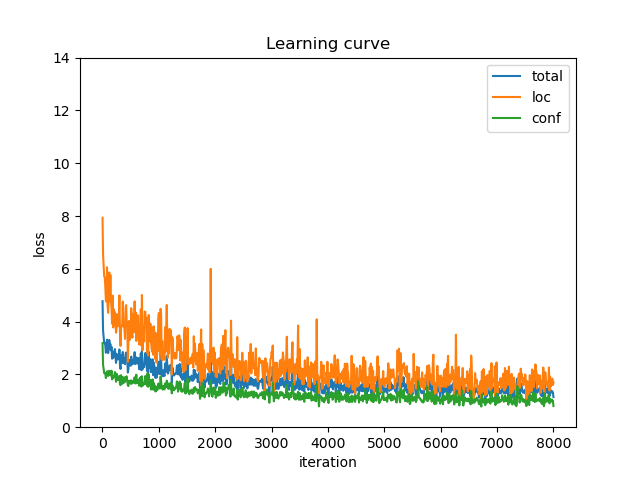

Saved graph to ../weights/results/train-icdar2015-stage1_learning-curve_i-8000.png


In [4]:
optimizer = Adam(model.parameters(), lr=1e-4, weight_decay=5e-4)

save_manager = SaveManager(modelname='train-icdar2015-stage1', interval=1000, max_checkpoints=15, plot_yrange=(0, 8), plot_interval=10)
trainer = TrainObjectDetectionJupyterLogger(LiveGraph(yrange=(0, 8)), TextBoxLoss(alpha=0.2, conf_loss=ConfidenceLoss(neg_factor=3)), model, optimizer)

trainer.train_iter(save_manager, 8000, train_loader)

In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

from dl.data.txtdetn import augmentations, datasets, target_transforms, transforms
from dl.data.txtdetn.utils import batch_ind_fn_droptexts
from dl.models.ssd.textboxespp import TextBoxesPP

from dl.loss.textboxespp import TextBoxLoss, ConfidenceLoss
from dl.optim.scheduler import IterStepLR
from dl.log import *

#from torchvision import transforms > not import!!
from torch.utils.data import DataLoader
from torch.optim.adam import Adam
import torch

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
augmentation = augmentations.RandomSampled()
#augmentation = None

transform = transforms.Compose(
    [transforms.Resize((768, 768)),
     transforms.ToTensor(),
     transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     #target_transforms.ToQuadrilateral(),
     target_transforms.OneHot(class_nums=datasets.SynthText_class_nums, add_background=True),
     target_transforms.ToTensor()]
)

train_dataset = datasets.ICDAR2015TextDataset(ignore=None, transform=transform, target_transform=target_transform, augmentation=augmentation)

train_loader = DataLoader(train_dataset,
                          batch_size=8,
                          shuffle=True,
                          collate_fn=batch_ind_fn_droptexts,
                          num_workers=4,
                          pin_memory=True)

In [3]:
model = TextBoxesPP(input_shape=(768, 768, 3)).cuda()
model.load_weights('../weights/results/icdar2015/train-icdar2015-stage1_i-8000.pth')

<IPython.core.display.Javascript object>


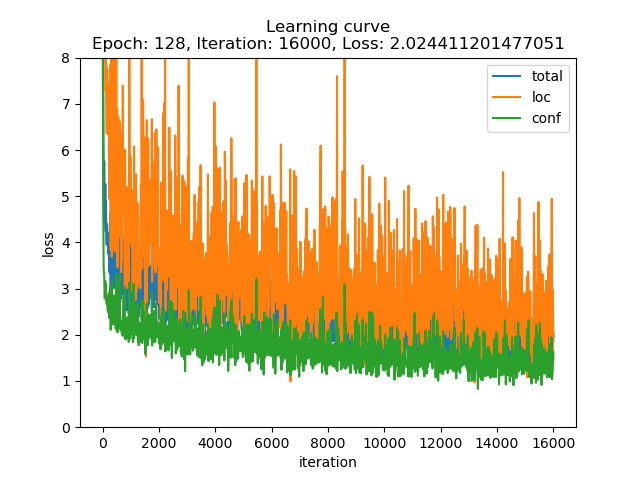

Training... Epoch: 8, Iter: 1000,	 [1000/1000	 (100%)]	Loss: 3.385427, Loc Loss: 4.885148, Conf Loss: 2.408398	Iter time: 0.3600
Saved model to ../weights/checkpoints/train-icdar2015-stage2-batch16_i-0001000_checkpoints20200617.pth

Training... Epoch: 16, Iter: 2000,	 [1000/1000	 (100%)]	Loss: 2.354117, Loc Loss: 2.696239, Conf Loss: 1.814869	Iter time: 0.3652
Saved model to ../weights/checkpoints/train-icdar2015-stage2-batch16_i-0002000_checkpoints20200617.pth

Training... Epoch: 24, Iter: 3000,	 [1000/1000	 (100%)]	Loss: 2.342074, Loc Loss: 3.318847, Conf Loss: 1.678305	Iter time: 0.4095
Saved model to ../weights/checkpoints/train-icdar2015-stage2-batch16_i-0003000_checkpoints20200617.pth

Training... Epoch: 32, Iter: 4000,	 [1000/1000	 (100%)]	Loss: 2.131476, Loc Loss: 2.654154, Conf Loss: 1.600645	Iter time: 0.3680
Saved model to ../weights/checkpoints/train-icdar2015-stage2-batch16_i-0004000_checkpoints20200617.pth

Training... Epoch: 40, Iter: 5000,	 [1000/1000	 (100%)]	Loss: 2.0

<IPython.core.display.Javascript object>


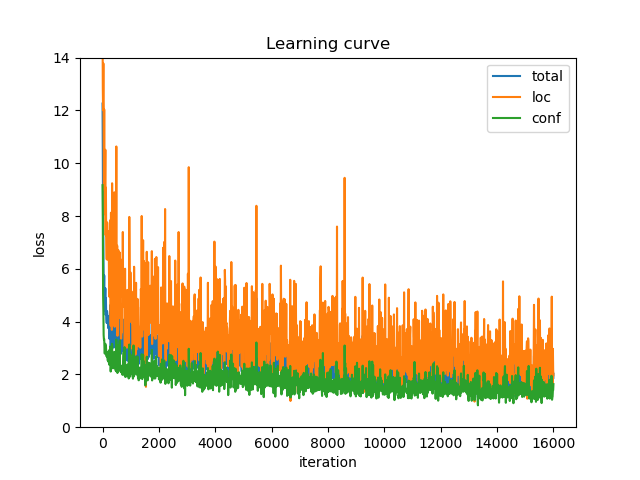

Saved graph to ../weights/results/train-icdar2015-stage2-batch16_learning-curve_i-16000.png


In [4]:
optimizer = Adam(model.parameters(), lr=1e-5, weight_decay=5e-4)

save_manager = SaveManager(modelname='train-icdar2015-stage2', interval=1000, max_checkpoints=15, plot_yrange=(0, 8), plot_interval=10)
trainer = TrainObjectDetectionJupyterLogger(LiveGraph(yrange=(0, 8)), TextBoxLoss(alpha=0.2, conf_loss=ConfidenceLoss(neg_factor=6)), model, optimizer)

trainer.train_iter(save_manager, 16000, train_loader)